# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random as rd
import numpy as np
import pandas as pd
import matplotlib

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice():
    return [rd.randint(1,6) for x in range(10)]
dice_results = dice()
dice_results

[6, 5, 3, 3, 5, 2, 4, 1, 2, 4]

#### 2.- Plot the results sorted by value.

In [3]:
# your code here
df = pd.DataFrame(dice_results).sort_values(by=0)
df

,0
7,1
5,2
8,2
2,3
3,3
6,4
9,4
1,5
4,5
0,6


In [4]:
df.plot(kind="bar")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

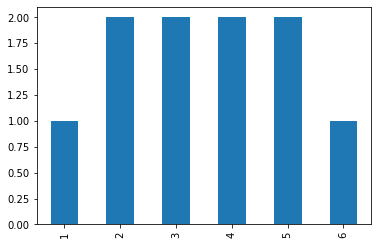

In [5]:
# your code here
df[0].value_counts().sort_index().plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f2086d0>]],
      dtype=object)

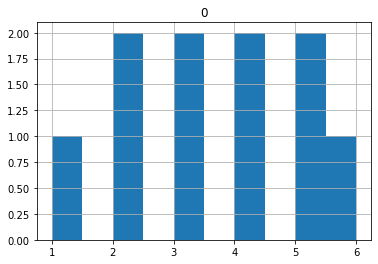

In [6]:
df.hist()

In [7]:
"""
The barchart plots each value individually, while the histogramm group identical values in order to visualize
their frequency within the distribution.
"""

'\nThe barchart plots each value individually, while the histogramm group identical values in order to visualize\ntheir frequency within the distribution.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def mean(x):
    return sum(x) / len(x)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
new_roll = dice() 
new_roll

[3, 3, 6, 2, 6, 3, 5, 5, 3, 2]

In [10]:
new_roll.sort()

In [11]:
new_roll

[2, 2, 3, 3, 3, 3, 5, 5, 6, 6]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f2e07d0>]],
      dtype=object)

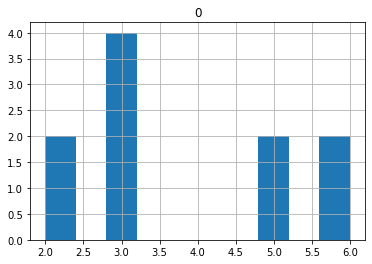

In [12]:
df = pd.DataFrame(new_roll)
df.hist()

In [13]:
mean(new_roll)

3.8

In [36]:
int(new_roll[((len(new_roll)//2)+1)-1])

3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [40]:
# your code here

def median(x):
    if len(x)%2 == 0:
        med = (x[len(x)//2]+x[((len(x)//2)+1)-1])//2
    elif len(x)%2 != 0:
        med = (x[((len(x)+1)//2)-1])
    return med

median(new_roll)

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [126]:
# your code here
q1 = new_roll[:5]
q3 = new_roll[5:]

In [127]:
median(q1)

3

In [128]:
median(q3)

5

In [132]:
df.max()

0    6
dtype: int64

In [133]:
df.min()

0    2
dtype: int64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

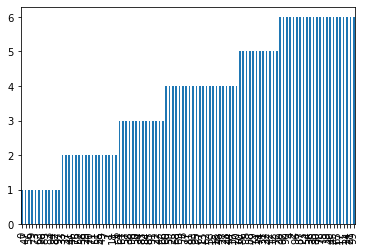

In [86]:
# your code here
dice = pd.read_csv('roll_the_dice_hundred.csv')

dice_sorted = dice.drop(['Unnamed: 0'], axis = 1).sort_values(by = 'value')

dice_sorted['value'].plot(kind="bar")

In [52]:
"""
this resembles a right-skewed distribution, as the higher the number, the higher the occurence.
"""

'\nyour comments here\n'

In [90]:
dice_list = dice_sorted['value'].tolist()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [91]:
# your code here
mean(dice_list)

3.74

#### 3.- Now, calculate the frequency distribution.


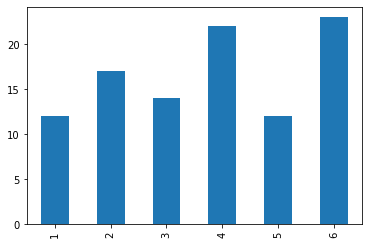

In [88]:
dice_sorted['value'].value_counts().sort_index().plot(kind="bar")

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1207870d0>]],
      dtype=object)

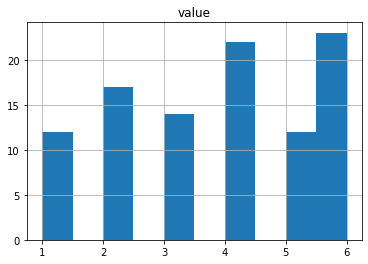

In [92]:
# your code here
dice.hist(['value'])

In [ ]:
"""
given the lower frequency of 5, the mean hovers around 3.74
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

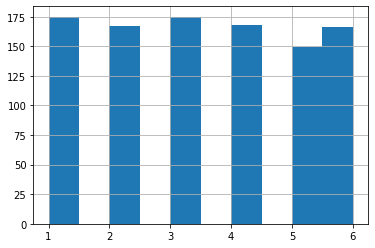

In [99]:
# your code here
thousand = pd.read_csv('roll_the_dice_thousand.csv')

thousand['value'].hist()

In [ ]:
"""
the distribution has become more flat. This is because with a higher sample, the distribution will near a
flat distribution curve.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [102]:
# your code here
ages_pop = pd.read_csv('ages_population.csv')
ages_pop

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


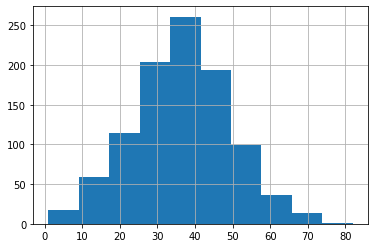

In [103]:
# your code here
ages_pop['observation'].hist()

# the mean will be around 32 - 38
# the SD will be at ca. 20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [106]:
ages_pop_list = ages_pop['observation'].tolist()
mean(ages_pop_list)

36.56

In [110]:
ages_pop['observation'].std()

12.816499625976762

In [ ]:
"""
I overestimated the SD as I thought that it would take a larger range to include 68% of the distribution.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [111]:
# your code here
ages_pop2 = pd.read_csv('ages_population2.csv')
ages_pop2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d9f510>]],
      dtype=object)

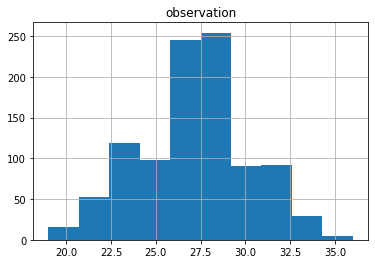

In [112]:
ages_pop2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
this distribution is focused on young people. It seems normally distributed, although from 22.5 - 27.5 are by 
far the largest age groups.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [113]:
# your code here
ages_pop2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
this result is in line with my expectations. The SD is quite narrow, as the range of the diostribution is narrow itself
and centers on the 2 largest age groups. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [114]:
# your code here
ages_pop3 = pd.read_csv('ages_population3.csv')
ages_pop3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120eb58d0>]],
      dtype=object)

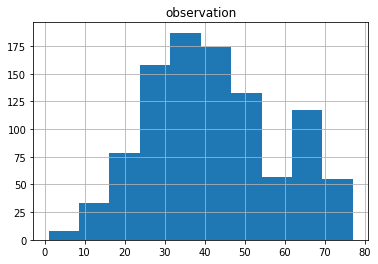

In [115]:
ages_pop3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [116]:
# your code here
ages_pop3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
the population in this neighbourhood has a higher mean age. There is a higher percentage of older people and less
children. Furthermore there is less of a dominance of the young people, which creates a higher SD.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
"""
the mean is higher than the median, which indicates a right-skewed curve.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [119]:
# your code here
ages_pop3.observation.quantile(0.85)

64.0

In [120]:
ages_pop3.observation.quantile(0.15)

25.0

In [ ]:
"""
These percentiles, along with the other quartiles, further demonstrate that the distribution is a 
right-skewed curve.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""